In [3]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import pipeline

# # Define the list of XLNet models to ensemble
# model_names = ['xlnet-base-cased', 'xlnet-large-cased']

# # Create the ensemble
# ensemble_models = []
# for model_name in model_names:
#     # Load the XLNet model
#     model = AutoModelForSequenceClassification.from_pretrained(model_name)
#     ensemble_models.append(model)

# # Load the XLNet tokenizer
# tokenizer = AutoTokenizer.from_pretrained('xlnet-base-cased')

# # Define the combined prediction function for the ensemble
# def combined_predict(text):
#     outputs = []
#     for model in ensemble_models:
#         # Tokenize the input text
#         inputs = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt')

#         # Make predictions with the model
#         logits = model(**inputs)[0]
#         predicted_labels = logits.argmax().item()
#         outputs.append(predicted_labels)

#     return outputs


In [4]:
# # Use the combined model to make predictions
# text = "This is not a good sentence and I hate this"
# predictions = combined_predict(text)
# print(predictions)


In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model_names = [
    "scaredmeow/roberta-tagalog-sentiment-hatespeech",
    "scaredmeow/xlnet-tagalog-sentiment-hatespeech",
]


def combined_predict(text):
    outputs = []
    for i in range(len(model_names)):
        outputs.append(
            pipeline(
                "sentiment-analysis", model=model_names[i], tokenizer=model_names[i]
            )(text)
        )
    return outputs


In [6]:
import pandas as pd

valid = pd.read_csv("../data/hatespeech/valid.csv")


pred = combined_predict(valid.text.tolist())


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [10]:
y_pred = []

for i in range(len(pred[0])):
    if pred[0][i]["score"] > pred[1][i]["score"]:
        y_pred.append(pred[0][i]["label"])
    else:
        y_pred.append(pred[1][i]["label"])

y_pred = [1 if (i == "LABEL_1") or (i == "positive") else 0 for i in y_pred]

y_true = valid.label.tolist()


In [11]:
y_pred


[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


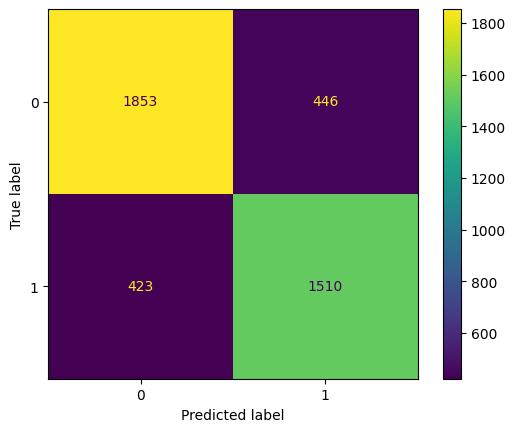

Accuracy: 0.7946597353497165
Precision: 0.79306563374916
Recall: 0.7935858884640683
F1 score: 0.7933019431294936


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

# Compute the accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Compute the precision
prec = precision_score(y_true, y_pred, average="macro")
print("Precision:", prec)

# Compute the recall
rec = recall_score(y_true, y_pred, average="macro")
print("Recall:", rec)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average="macro")
print("F1 score:", f1)

# # Compute the log-loss
# ll = log_loss(y_true, y_pred, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(y_true, y_pred, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)
